$$
  \huge{\text{Teste Binomial}}
$$

O teste não-paramétrico Binomial, é utilizidado para contextos em que queremos verificar a existência de uma proporção de características de interesse. O método trabalha com informações dicotômicas e parte do princípio de que os elementos possuem (sucesso) ou não (fracasso) alguma característica de interesse (n ensaios de Bernoulli).

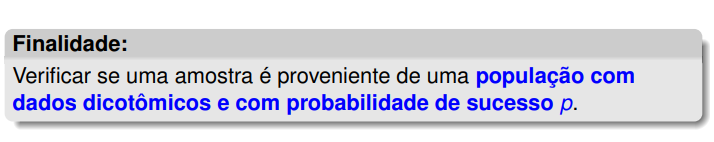

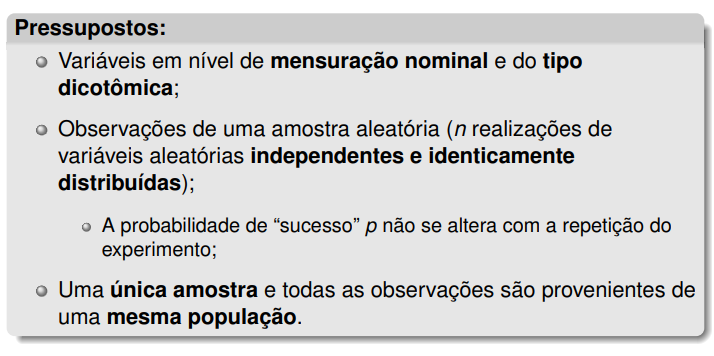

## Descrição dos Dados

Trabalharemos com uma dataset de características de pessoas. Dentre essas variávies, temos interesse na variável "Nível de Obesidade".

In [ ]:
dados <- read.csv('Obesity Classification.csv')

In [ ]:
nrow(dados)

[1] 108

In [14]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
dados_obesos = filter(dados,Label=="Obese" | Label=="Overweight")
nrow(dados_obesos) ## Quantidade de homens e mulheres obesas ou com sobrepeso

[1] 32

In [ ]:
dados_homens <-filter(dados,Gender=="Male")
head(dados_homens)

,ID,Age,Gender,Height,Weight,BMI,Label
,<int>,<int>,<chr>,<int>,<int>,<dbl>,<chr>
1,1,25,Male,175,80,25.3,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,5,45,Male,190,100,31.2,Obese
4,7,55,Male,200,110,34.2,Obese
5,9,65,Male,210,120,37.2,Obese
6,11,18,Male,175,70,23.4,Normal Weight


In [ ]:
dados_homens_obesos <-filter(dados_homens,Label=="Obese" | Label=="Overweight")
nrow(dados_homens_obesos)

[1] 24

## Hipóteses

A princípio testaremos se a proporção de homens obesos é maior que a de mulheres obesas. Dado que p é a proporção de homens obesos ou com sobrepeso, temos:

$$
H_0: p = 0,5
$$
$$
H_1: p > 0,5
$$

## Aplicação do Teste

Temos um total de 32 registros de pessoas obesas, dentre essas 24 homens estão nesta condição. Assim:

$$
O_i = 24
$$

Aplicando o texte para $ α = 0,05 = 5\% $ e especificando que trata-se um teste bilateral à direita:

In [ ]:
binom.test(24, 32, 0.5, 'greater', 0.95)


	Exact binomial test

data:  24 and 32
number of successes = 24, number of trials = 32, p-value = 0.0035
alternative hypothesis: true probability of success is greater than 0.5
95 percent confidence interval:
 0.593943 1.000000
sample estimates:
probability of success 
                  0.75 


## Resultados

Dentre as 32 pessoas com obesidade/sobrepeso, há 24 que são homens, havendo 75% de proporção para esta condição. Neste contexto, para $α = 0,05 = 5%$, ao aplicar o teste Binomial, obteve-se  $p-valor = 0,0035$.

Portantando, há evidências para rejeitar $H_0$.

# Conclusão

Dado um Nível de Significância de 5%, temos evidências estatisticamente suficentes de que a proporção de homens obesos ou com sobrepeso da amostra é maior que 50%.

$$
  \huge{\text{Teste do Quantil}}
$$

O Teste não-paramétrico do Quantil possui como finalidade principal o conecimento de quantis da amostra. Com ele podemos testar se algum quantil corresponde ao valor de característica testado.

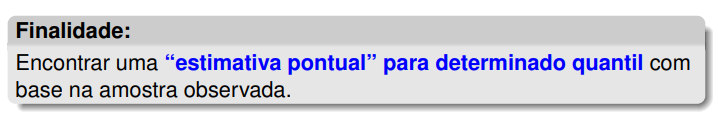

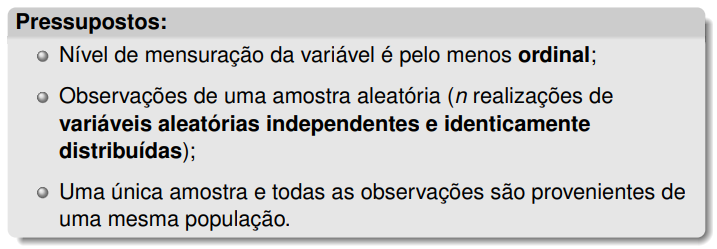

## Descrição dos Dados

Utilizaremos o mesmo dataset de pesos de pessoas so sexo masculino e feminino. Entretanto, agroa focaremos em todos os elementos.

In [9]:
dados <- read.csv('Obesity Classification.csv')
head(dados)

,ID,Age,Gender,Height,Weight,BMI,Label
,<int>,<int>,<chr>,<int>,<int>,<dbl>,<chr>
1,1,25,Male,175,80,25.3,Normal Weight
2,2,30,Female,160,60,22.5,Normal Weight
3,3,35,Male,180,90,27.3,Overweight
4,4,40,Female,150,50,20.0,Underweight
5,5,45,Male,190,100,31.2,Obese
6,6,50,Female,140,40,16.7,Underweight


In [10]:
dados_pesos <- dados['Weight']
nrow(dados_pesos)

[1] 108

In [11]:
head(dados_pesos)

,Weight
,<int>
1,80
2,60
3,90
4,50
5,100
6,40


## Hipóteses

O foco estrá em testar se o primeiro quartil (25%) da amostra é menor que 60. Matematicamente:

$$
H_0: \text{O quantil 25% é maior ou igual que 60 ou } H_0: P(X \leq 60) \leq 25\%
$$
$$
H_1: \text{O quantil 25% é menor que 60 ou } H_1: P(X \leq 60) > 25\%
$$

## Aplicação do Teste

Trata-se de um teste bilateral à direita e vamos utilizar $α = 0,05 = 5\%$

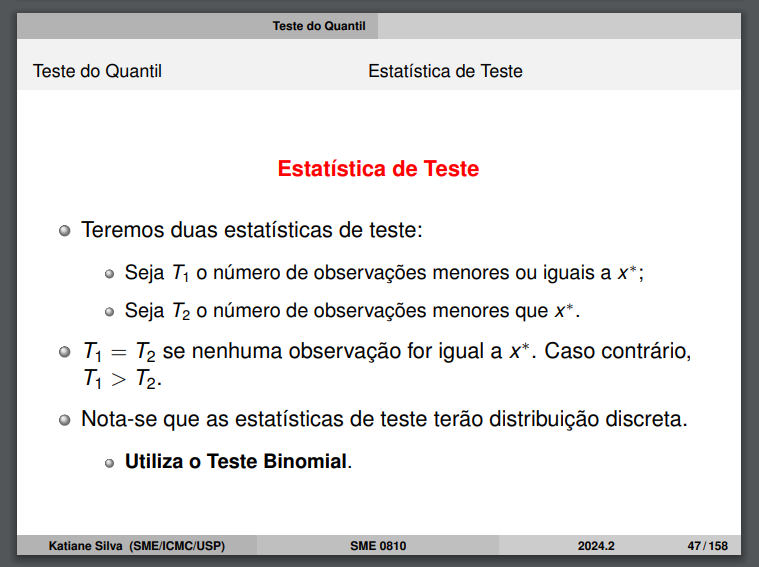

In [16]:
dados_peso_menor_60 <- filter(dados_pesos, Weight<60)
nrow(dados_peso_menor_60)

[1] 55

In [17]:
dados_peso_menor_igual_60 <- filter(dados_pesos, Weight<=60)
nrow(dados_peso_menor_igual_60)

[1] 59

Assim:

$$
T_1 = 59\text{ e }T_2 = 55
$$

Aplicando o teste:

In [22]:
n <- nrow(dados)
x0 <- 60
p0 <- 0.25
T1 <- 59

binom.test(T1,n,p0,alternative = "greater")


	Exact binomial test

data:  T1 and n
number of successes = 59, number of trials = 108, p-value = 4.879e-11
alternative hypothesis: true probability of success is greater than 0.25
95 percent confidence interval:
 0.4626568 1.0000000
sample estimates:
probability of success 
             0.5462963 


## Resultados

Ao nível de significância $α$. Obteve-se $p-valor = 4,879e^{-11} < α = 5%$. Assim, temos evidências suficientes para rejeitarmos $H_0$.

## Conclusão

Ao nível de significância de 5%, os dados nos dão evidências estatisticamente suficientes de que o quantil 25% da amostra de pesos é menor que 60.

In [31]:
quantile(dados_pesos, 0.25)

25% 
 35

De fato, a conclusão do teste se verifica.